# Python y gráficos 

In [1]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark.sql.functions as f
from pyspark.sql import SparkSession

from pyspark.sql.functions import (max as ps_max, min as ps_min, count as ps_count, when, desc, col, lit, countDistinct, sqrt as ps_sqrt, ceil, row_number,
                                   monotonically_increasing_id, lead, sum as ps_sum, log as ps_log, abs as ps_abs, round as ps_round, rank, 
                                   stddev as ps_stddev, mean as ps_mean)

In [2]:
from pyspark.sql import SparkSession

app_name = "Capacitación Python"

spark = SparkSession.builder \
        .appName(app_name) \
        .master("yarn") \
        .config("spark.driver.memory","16g")\
        .config("spark.executor.memory","10g")\
        .config("spark.sql.autoBroadcastJoinThreshold", -1)\
        .config('spark.executor.memoryOverhead','6gb')\
        .config("spark.sql.crossJoin.enabled", "true")\
        .config("spark.yarn.queue", "root.g_ey_metyprov_val")\
        .getOrCreate()

spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/30 09:26:03 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/03/30 09:26:03 WARN util.Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
spark.sparkContext.setLogLevel("off")

## 1.- Estructuras de datos

### 1.1 Datos no iterables / tipos de números

En esta sección nos encontramos con los siguientes tipos de datos

* Integers - int()
* Floating point - float()
* Boolean - bool()
* Complex - complex()

Estudiamos su estructura con algunos ejemplos

#### Enteros

In [90]:
# Tipo de dato Entero
Interger = 3
type(Interger)

int

#### Flotante ("real")

In [91]:
# Tipo de dato flotante
floating_point = 3.
type(floating_point)

float

#### Booleano (True,False)

In [92]:
# Tipo de dato Booleano

# Para este caso, nos encontramos tan solo con 2 tipos
type(True),type(False)

(bool, bool)

In [93]:
booleano = True
booleano == False

False

In [94]:
type(5) == int

True

#### Complejos

In [95]:
# Tipo de dato complejo
complejo = 1+2j
type(complejo)

# otra manera de crear un número coplejo es utilizando la función complex
complejo_1 = complex(2,3)
type(complejo_1)

complex

### 1.2 Datos iterables

#### 1.2.1 String (str) : Tipo de dato utilizado para almacenar textos.

In [96]:
String = "ProviCap"
type(String)

str

In [97]:
# Acceder a posiciones del texto
String[3]

'v'

In [98]:
String[0:5], String[5:]

('Provi', 'Cap')

El ciclo for tiene la estructura:

```python
for elemento in iterable:
    #ejecución del progama
```

In [99]:
for letra in String:
    print(letra)

P
r
o
v
i
C
a
p


In [100]:
# Es posible concatener texto con otros datos de tipo string (+)
"Equipo "+String

'Equipo ProviCap'

In [101]:
"Santander"*3

'SantanderSantanderSantander'

In [102]:
# Podemos repetir n veces su contenido 
20*"-"+" ¡"+String+"! "+(20*"-")

'-------------------- ¡ProviCap! --------------------'

##### Obs : En algunas ocasiones valores numéricos en tablas vienen almacenados como string. Podemos transformar esos datos a valores numéricos, siempre que tengan la estructura correcta, de la siguiente forma:


In [103]:
type("32"), type(int("32")), type(float("32"))

(str, int, float)

In [104]:
variable = "32"
type(float(variable))

float

In [105]:
float("32.4")

32.4

In [106]:
type(float("32,4".replace(",",".")))

float

In [108]:
int("32.4") # <- Estructura NO compatible con dato Entero

ValueError: invalid literal for int() with base 10: '32.4'

### -> Métodos usuales strings <-

#### string.replace()

```python
string.replace(old,new,count)
"""
Reemplaza string por otro. El parámetro opcional "count", de ser dado, reemplaza la cantidad numérica de strings en orden.
"""
```

In [109]:
String.replace("a","A").replace("v","%")

'Pro%iCAp'

#### Puede ser útil a la hora de querer transformar variables que vengan porcentuales en tablas guardadas como string a flotante

In [110]:
porcentaje = "93%"
porcentaje_numerico = float(porcentaje.replace("%",""))/100

In [111]:
porcentaje_numerico

0.93

##### string.upper(), string.lower()

```python
string.upper()
"""
String a mayúscula
"""
string.lower()
"""
String a minúscula
"""
```

In [112]:
String.lower(),String.upper()

('provicap', 'PROVICAP')

#### String.split(sep)

```python
string.split(separador)
"""
separador puede ser considerado como otra cadena o valor regular en el string
"""
```


In [113]:
variable = "Equipo ProviCap"
variable.split(" ")

['Equipo', 'ProviCap']

In [114]:
rut = "19.997.082-8"
rut.split("-")[0]

'19.997.082'

In [115]:
str(123.3)[0:3]

'123'

Para más información puede consultar : https://recursospython.com/guias-y-manuales/30-metodos-de-las-cadenas/

#### 1.2.2 Listas : Utilizadas para almacenar múltiples valores en una sola variable. -> mutables <-

In [116]:
lista = [12,3.14,True,"ProviCap"]

In [117]:
lista[3]

'ProviCap'

In [118]:
for elemento in lista:
    print(elemento, type(elemento))

12 <class 'int'>
3.14 <class 'float'>
True <class 'bool'>
ProviCap <class 'str'>


In [119]:
# Incluso podríamos almacenar lista dentro de listas
listas = [["*","*","*"],["*","*","*"],["*","*","*"]]

In [120]:
for  lista in listas:
    print(lista)

['*', '*', '*']
['*', '*', '*']
['*', '*', '*']


En función de lo anterior, veamos algunos ejemplos:

```python
# Instrucción 1
acum = 0
count = 0
for elemento in [1,2,3]:
    print("Iteración "+str(count +1))
    print(elemento)
    acum += elemento
    count += 1
print("Fin del ciclo")
print("Acumulador: "+str(acum))


# Instrucción 2
lista = []
for elemento in [1,2,3,4,5,6,7,8,9,0]:
    if elemento % 2 ==0:
        lista.append(elemento)
print("Fin el ciclo")


# Instrucción 3
lista = []
for elemento in [1,"perro",3,4,5,"gato",7,8,9,10]:
    if type(elemento) == str:
        lista.append(elemento)
print(elemento)
```

In [121]:
acum = 0
count = 0
for elemento in [1,2,3]:
    print("Iteración "+str(count +1))
    print(elemento)
    acum += elemento
    count += 1
print("Fin del ciclo")
print("Acumulador: "+str(acum))

Iteración 1
1
Iteración 2
2
Iteración 3
3
Fin del ciclo
Acumulador: 6


In [122]:
lista = []
for elemento in [1,2,3,4,5,6,7,8,9,10]:
    if elemento % 2 ==0:
        lista.append(elemento)
print("Fin el ciclo")

Fin el ciclo


In [123]:
lista

[2, 4, 6, 8, 10]

In [124]:
lista = []
for elemento in [1,"perro",3,4,5,"gato",7,8,9,10]:
    if type(elemento) == str:
        lista.append(elemento)
print(elemento)

10


In [125]:
lista

['perro', 'gato']

### -> Métodos usuales Listas <-

#### list.append()

```python
lista.append(elemento)
```

In [126]:
lista.append("Santander")

In [127]:
lista

['perro', 'gato', 'Santander']

In [128]:
# Una forma usual para el llenado de listas es anclar la función append con el ciclo for 
lista_1 = []
for i in range(8):
    lista_1.append(2*i)
lista_1

[0, 2, 4, 6, 8, 10, 12, 14]

In [129]:
for i in range(5,15):
    print(i)

5
6
7
8
9
10
11
12
13
14


#### list.extend()

```python
lista.extend(otra_lista)
"""
Recibe una lista como argumento, y extiende la solicitada
"""
```

In [130]:
lista = [12,3.14,True,"ProviCap"]

In [131]:
lista.extend([1,2,3])

In [132]:
lista.append([1,2,3])

In [133]:
lista

[12, 3.14, True, 'ProviCap', 1, 2, 3, [1, 2, 3]]

¿Cuál es la diferencia entre estos 2 métodos?

In [134]:
#################################################

También podríamos unir elementos sin mutar la lista concatenando por medio de +

In [135]:
lista_2 = [2,3,5]

In [136]:
lista_2+[1,4]

[2, 3, 5, 1, 4]

In [137]:
lista_2

[2, 3, 5]

#### list.count()

```python
lista.count(elemento)
"""
Cuenta la cantidad de veces que el elemento se repite en la lista
"""
```

In [138]:
lista_2.extend([2,2])
lista_2

[2, 3, 5, 2, 2]

In [139]:
lista_2.count(2)

3

#### list.index(elemento)

```python
lista.index(elemento)
"""
Retorna el índice en el cual aparece el elemento (Error si no existe)
"""
```

In [140]:
lista

[12, 3.14, True, 'ProviCap', 1, 2, 3, [1, 2, 3]]

In [141]:
lista.index("ProviCap")

3

#### list.pop()

```python
lista.pop(posicion)
"""
Elimina y RETORNA el elemento en la posición indicada
"""
```

In [142]:
Equipo = lista.pop(3)
Equipo

'ProviCap'

In [143]:
lista

[12, 3.14, True, 1, 2, 3, [1, 2, 3]]

#### list.remove()

```python
lista.remove(elemento)
"""
Remueve elemento, pero no lo retorna
"""
```

In [144]:
valor_3 = lista_2.remove(3)

In [145]:
print(valor_3)

None


#### list.sort()

```python
lista.sort(reverse=False)
"""
Ordena los elementos de menor a mayor. En caso de tratarse de string, la función sort la ordenará alfabéticamente
"""
```

In [147]:
lista_3 = [8,3,9,5,0,1928,2]
lista_3.sort()
lista_3

[0, 2, 3, 5, 8, 9, 1928]

In [148]:
lista_3.sort(reverse=True)
lista_3

[1928, 9, 8, 5, 3, 2, 0]

In [149]:
lista_3

[1928, 9, 8, 5, 3, 2, 0]

### *Extra!*: Librería numpy

Utilizada para el cálculo numérico y análisis de datos. Podríamos pensar que los "*arrays*" de numpy son vectores de $\mathbb{R}^{n}$.

```python
import numpy as np
```

In [150]:
import numpy as np

In [151]:
lista_ejemplo = [1,5,7,98]
array_ejemplo = np.array(lista_ejemplo)

In [152]:
array_ejemplo + np.array([1,1,1,1])

array([ 2,  6,  8, 99])

### 1.2.3 Tuplas : Utilizadas para almacenar múltiples valores en una sola variable. -> inmutables <-

In [153]:
tupla = (12,3.14,True,"ProviCap")
type(tupla)

tuple

In [154]:
tupla.count(12)

1

In [155]:
tupla.index(12)

0

In [156]:
for elemento in tupla:
    print(elemento)

12
3.14
True
ProviCap


Además, como siempre, podemos transformar elementos tipo tupla a lista y viceversa.

In [157]:
tupla_a_lista = list(tupla)
lista_a_tupla = tuple(lista)

In [158]:
type(tupla_a_lista), type(lista_a_tupla)

(list, tuple)

### 1.2.4 Diccionarios : Estructura útil y práctica para la búsqueda de información y almacenamiento.

Su estructura sigue un esquema $\lbrace clave:valor\rbrace$

In [159]:
diccionario = {"Nombre":"Pablo", "Edad":25, "Idiomas":["Español","Inglés","Francés"] }

In [160]:
print(diccionario["Nombre"])
print(diccionario["Edad"])
print(diccionario["Idiomas"])

Pablo
25
['Español', 'Inglés', 'Francés']


También podemos agregar elementos al diccionario de la siguiente manera

In [161]:
diccionario["Perro"] = "Gato"

In [162]:
diccionario

{'Nombre': 'Pablo',
 'Edad': 25,
 'Idiomas': ['Español', 'Inglés', 'Francés'],
 'Perro': 'Gato'}

In [163]:
diccionario["Idioma materno"] = diccionario["Idiomas"][0]

In [164]:
diccionario

{'Nombre': 'Pablo',
 'Edad': 25,
 'Idiomas': ['Español', 'Inglés', 'Francés'],
 'Perro': 'Gato',
 'Idioma materno': 'Español'}

### -> Métodos usuales diccionaros->

#### dict.items()

```python
diccionario.items()
"""
Retorna claves y valores de un diccionario
"""
```

In [165]:
diccionario.items()

dict_items([('Nombre', 'Pablo'), ('Edad', 25), ('Idiomas', ['Español', 'Inglés', 'Francés']), ('Perro', 'Gato'), ('Idioma materno', 'Español')])

Usualmente lo podemos utilizar para iterar sobre un diccionario necesitando las claves y valores

In [166]:
print("Clave"+(" "*15)+"Valor")
print("")
for clave,valor in diccionario.items():
    print(clave," "*15,valor)

Clave               Valor

Nombre                 Pablo
Edad                 25
Idiomas                 ['Español', 'Inglés', 'Francés']
Perro                 Gato
Idioma materno                 Español


#### dict.keys()

```python
diccionario.keys()
"""
Obtiene claves de un diccionario
"""
```

In [167]:
diccionario.keys()

dict_keys(['Nombre', 'Edad', 'Idiomas', 'Perro', 'Idioma materno'])

In [168]:
print("Las claves de nuestro diccionario son:\n")
for key in diccionario.keys():
    print(key)

Las claves de nuestro diccionario son:

Nombre
Edad
Idiomas
Perro
Idioma materno


#### dic.values()

```python
dicionario.values()
"""
Retorna valores de un diccionario
"""
```

In [169]:
diccionario.values()

dict_values(['Pablo', 25, ['Español', 'Inglés', 'Francés'], 'Gato', 'Español'])

In [170]:
print("Los valores de nuestro diccionario son:\n")
for value in diccionario.values():
    print(value)

Los valores de nuestro diccionario son:

Pablo
25
['Español', 'Inglés', 'Francés']
Gato
Español


In [171]:
for i in range(0,8,2):
    print(i)

0
2
4
6


In [172]:
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |  
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |

## 2.- Gráficos

```python
import matplotlib.pyplot as plt
import seaborn as sns 
```

In [173]:
import matplotlib.pyplot as plt

Aunque no existe una estructura única para realizar un gráfico con esta librería, podríamos tomar la siguiente estructura:

```python
fig = plt.figure(figsize=(x_size,y_size)) # Se define entorno del gráfico
plt.title("Título") # Asignación título del gráfico
plt.plot(datos_x,datos_y) # Ejecución gráfico
plt.xlabel("Eje x") # Nombre eje x
plt.ylabel("Eje y") # Nombre eje y
plt.grid() # Añade cuadrículas
```

Colores link : https://matplotlib.org/stable/gallery/color/named_colors.html

Veamos un ejemplo:

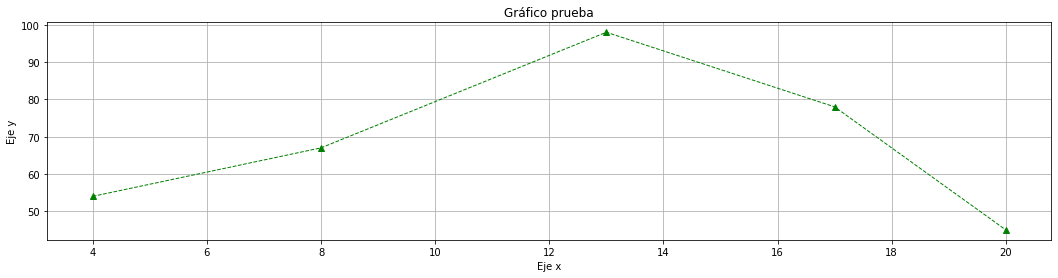

In [174]:
fig = plt.figure(figsize=(18,4))
plt.plot([4,8,13,17,20],[54, 67, 98, 78, 45],color="green",alpha=1,lw=1,marker='^',ls="--")
plt.title("Gráfico prueba")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid()

más información sobre parámetros extra: https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html

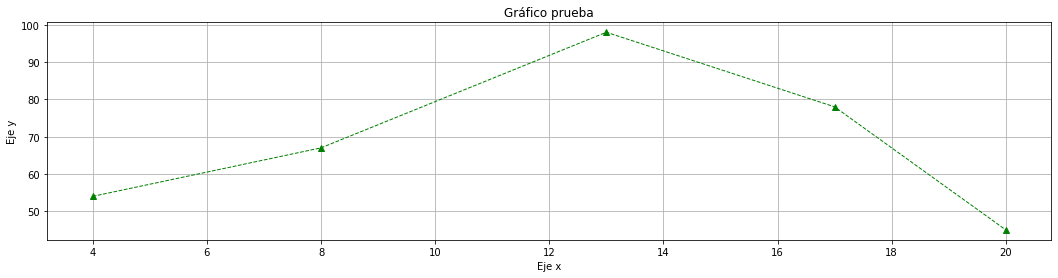

In [175]:
fig

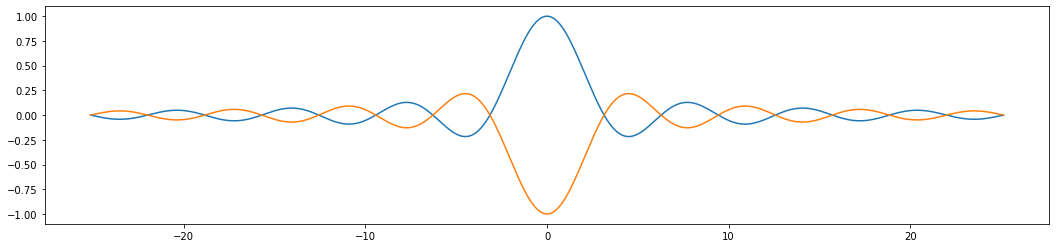

In [178]:
# Gráfica seno cardinal
import numpy as np

x = np.linspace(-8*np.pi,8*np.pi,400)
y = np.sin(x)/x

plt.figure(figsize=(18,4))
plt.plot(x,y)
plt.plot(x,-y)


In [ ]:
# Superponer 2 gráficos

Para más información sobre el gráfico de línea, consultar el siguiente link :
https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html

Por otro lado, si quisieramos realizar más de un gráfico en un entorno, podríamos guiarnos de la siguiente estructura (matricial):

```python
fig, axs = plt.subplots(num_filas,num_columnas)
plt.suptitle("Título General")
axs[0,0].plot(x_0,y_0)
axs[0,0].set_title("Título gráfico de la posición [0,0]")
#......................
axs[i,j].plot(x_i,y_j)
#......................
axs[num_filas-1,num_columnas-1].plot(x_fin,y_fin)
```

Veamos un ejemplo de esto:

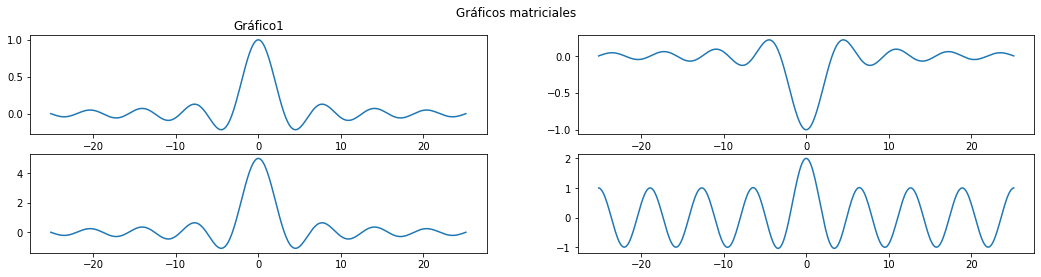

In [179]:
fig , axs = plt.subplots(2,2, figsize=(18,4))
plt.suptitle("Gráficos matriciales")
axs[0,0].plot(x,y)
axs[0,0].set_title("Gráfico1")
axs[0,1].plot(x,-y)
axs[1,1].plot(x,y+np.cos(x))
axs[1,0].plot(x,5*y)

Para encontrar otras metodologías para realizar subgráficos revisar link:
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

### 2.1 Ejemplo práctico #1

Antes de comenzar este ejemplo práctico, revisemos algunas funciones útilies asociadas a DataFrame de spark 

```python
# Función 1
df.select(Nombre_columna_1,...,Nombre_Columna_n)
"""
Selecciona y retorna un DataFrame tan solo con la columnas seleccinadas.
"""

# Función 2
df.printSchema()
"""
Devuelve el nombre de todas las columnas junto con el tipo de dato almacenado en cada una de ellas.
"""

# Función 3
df.columns
"""
Retorna una lista con el nombre de todas las columnas del DataFrame.
"""

# Función 4
df.orderBy(Nombre_columna)
"""
Devuelve el DataFrame ordenado en función de alguna columna en particular.
"""

# Función 5
df.take(n)
"""
Retorna una lista cuyos elementos son las primras n filas del DataFrame.
"""

# Función 6 
df.collect()
"""
Recolecta la información en una lista de TODAS las filas del DataFrame.
"""

# Función 7
df.withColumn(Nombre_Columna,f( col(Nombre_columna_1) ))
"""
Esta función toma como primer argumento el nombre de una columna existente o no; En el caso de existir la columna será modificada en función del segundo argunmento. En caso de no existir, se creará una columna nueva con las indicaciones entregadas en el segundo argumento de la función.

Observaciones:
1) Para obtener un argumento constante dentro de la columna se debe utilizar la función "lit(argumento)" en el segundo parámetro.              


2) Si se quiere cambiar el tipo de dato que posee una columna, podemos utilizar el método de columnas ".cast(DataType)" luego de realizar la transformación f(col).
"""

# Función 8
df.withColumnRenamed(old_col_name,new_col_name)
"""
Cambia nombre de alguna columna del DataFrame.
"""

# Función 9
df.filter(condición)
"""
Retorna un DataFrame filtrado con todas las columnas y solo las filas que satisfacen la condición indicada.
"""

# Función 10
df.where(condición)
"""
Idem filter
"""

# Función 11
when(condición,new_value) (.otherwise(value))
"""
Esta no es una función propiamente tal del objeto DataFrame, sin embargo se puede anclar funciones como - withColumn o Select - realizando un filtrado del estilo if-else. Su retorno es un objeto tipo "col"
"""
```
Puede encontrar más información (todo) en https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html

Conociendo este tipo de herramientas, tomemos el siguiente DataFrame y realicemos algunas pruebas:

In [180]:
df = spark.table("gmetyprov."+"GRAFICO_"+"PYI_NEG"+"_"+"prod_Driv4"+"_12A")

In [181]:
df.count()

36

In [86]:
df.withColumn("Animalización", when(col("prod_Driv4")==13,"Perrito").when(col("prod_Driv4")==113,"Gatito").when(col("prod_Driv4")==665,"Ave").otherwise("Castor")).toPandas()

,FEC_AN,prod_Driv4,N,AVG_LGD_T_LR,Animalización
0,2010,113,22,0.341662,Gatito
1,2009,13,114,0.501932,Perrito
2,2012,1665,6,0.452282,Castor
3,2016,1665,4,0.352234,Castor
4,2014,113,62,0.395670,Gatito
5,2009,113,31,0.388204,Gatito
6,2016,13,32,0.546166,Perrito
7,2015,13,26,0.353867,Perrito
8,2014,1665,3,0.365236,Castor
9,2008,1665,3,0.440664,Castor


In [89]:
df_aux = df.withColumn("prod_Driv4",col("prod_Driv4").cast("string"))

In [91]:
df.printSchema()

root
 |-- FEC_AN: integer (nullable = true)
 |-- prod_Driv4: integer (nullable = true)
 |-- N: long (nullable = true)
 |-- AVG_LGD_T_LR: double (nullable = true)



In [90]:
df_aux.printSchema()

root
 |-- FEC_AN: integer (nullable = true)
 |-- prod_Driv4: string (nullable = true)
 |-- N: long (nullable = true)
 |-- AVG_LGD_T_LR: double (nullable = true)



In [67]:
df.orderBy("prod_Driv4").toPandas()

,FEC_AN,prod_Driv4,N,AVG_LGD_T_LR
0,2008,13,127,0.651915
1,2012,13,45,0.481911
2,2013,13,45,0.500173
3,2010,13,93,0.542478
4,2009,13,114,0.501932
5,2016,13,32,0.546166
6,2015,13,26,0.353867
7,2011,13,50,0.533355
8,2014,13,37,0.391462
9,2010,113,22,0.341662


Ahora sí, volviendo al ejemplo práctico consideramos el siguiente DataFrame

In [12]:
df = spark.table("gmetyprov."+"CURVA_"+"PYI_NEG"+"_"+str(665)+"")
df.toPandas()

,escala,N_Oper,deuda_total,porc_gastos_medio_fd_lr,porc_cobros_medio_fd_lr,porc_recobro_medio_fd_lr,porc_gastos_ac_fd_lr,porc_cobros_ac_fd_lr,escala1,recobro_sc_fd_lr_0816,recobro_sc_fd_lr_1016,escala3,recobro_cc_1016
0,0,1054,1956547768,-0.000321,0.000009,-0.000312,-0.000321,0.000009,0,-0.000312,-0.000419,0.0,-0.000419
1,1,1054,1956547768,-0.000803,0.074191,0.073388,-0.001124,0.074200,1,0.073076,0.085945,1.0,0.083416
2,2,1054,1956547768,-0.000371,0.040659,0.040288,-0.001496,0.114859,2,0.113364,0.121463,2.0,0.118934
3,3,1054,1956547768,-0.000806,0.033573,0.032768,-0.002301,0.148433,3,0.146132,0.148383,3.0,0.145853
4,4,1054,1956547768,-0.000552,0.032194,0.031642,-0.002854,0.180627,4,0.177773,0.175071,4.0,0.171420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,54,50969861,0.000000,0.000000,0.000000,-0.015184,0.418798,139,0.403614,NaN,NaN,NaN
140,140,45,43148224,0.000000,0.000000,0.000000,-0.015184,0.418798,140,0.403614,NaN,NaN,NaN
141,141,31,25825005,0.000000,0.000000,0.000000,-0.015184,0.418798,141,0.403614,NaN,NaN,NaN
142,142,21,17059689,0.000000,0.000000,0.000000,-0.015184,0.418798,142,0.403614,NaN,NaN,NaN


Se pide graficar columna "escala" versus "recobro_sc_fd_lr_0816"

In [8]:
# Revisamos si alguna de las dos columnas posee valores nulos
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas() # Código genérico de utiliddd

,escala,N_Oper,deuda_total,porc_gastos_medio_fd_lr,porc_cobros_medio_fd_lr,porc_recobro_medio_fd_lr,porc_gastos_ac_fd_lr,porc_cobros_ac_fd_lr,escala1,recobro_sc_fd_lr_0816,recobro_sc_fd_lr_1016,escala3,recobro_cc_1016
0,0,0,0,0,0,0,0,0,0,0,24,24,24


Notando que en ambas columnas que nos interesan no existen nulos, procedemos a recolectar los datos sin problema. En general nos encontramos con dos métodos para la recolección de datos:

```python
# Forma 1
df.rdd.map(lambda x: x.nombre_columna).collect()
"""
Utilizada para capturar los elementos de una sola columna por filas
"""

# Forma 2
df["columna_1",...,"columna_n"].rdd.map(lambda x: x).collect()
"""
Utilizada para capturar los elementos de una columna o más por filas (Además podemos hacer operaciones para cada elemento)
"""
# Forma 3
df.select("columna_1",...,"columna_n").rdd.flatMap(lambda x: x).collect()
"""
Utilizada para capturar elementos de una columna o más por filas
"""
```

In [15]:
# PRUEBAS
forma_1 = df.rdd.map(lambda x: x.escala).collect()


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143]

In [22]:
df["escala","recobro_sc_fd_lr_0816","porc_gastos_medio_fd_lr"].rdd.map(lambda x: x).collect()[5]["recobro_sc_fd_lr_0816"]

0.19063940143300784

In [23]:
# Capturamos los datos para ejecutar la gráfica
escala = df.rdd.map(lambda x: x.escala).collect()
recobro = df.rdd.map(lambda x: x.recobro_sc_fd_lr_0816).collect()

In [25]:
recobro_porcentual = df.rdd.map(lambda x: x.recobro_sc_fd_lr_0816*100).collect()

In [26]:
recobro_porcentual

[-0.031193602308554075,
 7.307586573332446,
 11.336388300347492,
 14.613158366467783,
 17.77732396748237,
 19.063940143300783,
 20.628570059216436,
 21.33628789277741,
 22.554591363705974,
 23.700253888753792,
 24.37895178797823,
 25.43196609319665,
 26.273045086725595,
 27.285337269801502,
 28.058239117033036,
 28.735253903556863,
 29.32595780301326,
 29.89306754918904,
 30.34201876228737,
 30.71330543388503,
 31.475470515993102,
 33.04563958970919,
 33.39264797930219,
 34.296239516927926,
 34.540831581640525,
 35.04538835955124,
 35.22084692616691,
 35.432320946188916,
 35.692679196743086,
 35.77944817588573,
 36.25132915670279,
 36.6109141298257,
 36.85691308551368,
 37.04684188414847,
 37.32501927743208,
 37.72760949116552,
 37.90089842061917,
 38.084575343965696,
 38.16195166735486,
 38.36877705910979,
 38.52566811810244,
 38.72543822945807,
 38.928932474392646,
 39.05261783476381,
 39.23588161774798,
 39.25388288520581,
 39.28343092683275,
 39.361095506817996,
 39.528730142983534

Podemos realizar transformación de los datos recolectados utilizando la siguiente herramienta : *for in line*. Por su estructura compacta, se suele reemplazar la utilización de el método append() para el llenado de listas.

```python
# Sin condiciones
lista = [f(c) for c in iterable]
"""
lista conformada por la transformación f de elementos en un iterable.
"""

# Con condiciones
lista = [f(c) for c in iterable if condicion(c)]
"""
Se realizará el llenado e la lista con el elemento transformado f(c) siempre que "c" cumpla la condición
"""
```

In [28]:
recobro_by_for = [c*100 for c in recobro if c!=None]
recobro_by_for

[-0.031193602308554075,
 7.307586573332446,
 11.336388300347492,
 14.613158366467783,
 17.77732396748237,
 19.063940143300783,
 20.628570059216436,
 21.33628789277741,
 22.554591363705974,
 23.700253888753792,
 24.37895178797823,
 25.43196609319665,
 26.273045086725595,
 27.285337269801502,
 28.058239117033036,
 28.735253903556863,
 29.32595780301326,
 29.89306754918904,
 30.34201876228737,
 30.71330543388503,
 31.475470515993102,
 33.04563958970919,
 33.39264797930219,
 34.296239516927926,
 34.540831581640525,
 35.04538835955124,
 35.22084692616691,
 35.432320946188916,
 35.692679196743086,
 35.77944817588573,
 36.25132915670279,
 36.6109141298257,
 36.85691308551368,
 37.04684188414847,
 37.32501927743208,
 37.72760949116552,
 37.90089842061917,
 38.084575343965696,
 38.16195166735486,
 38.36877705910979,
 38.52566811810244,
 38.72543822945807,
 38.928932474392646,
 39.05261783476381,
 39.23588161774798,
 39.25388288520581,
 39.28343092683275,
 39.361095506817996,
 39.528730142983534

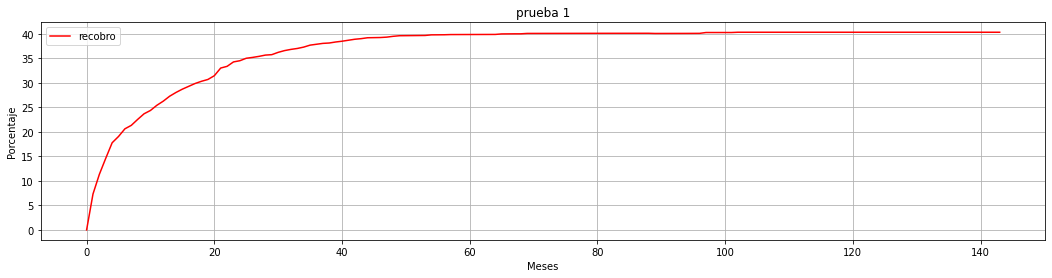

In [36]:
# Graficamos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,4))
plt.title("prueba 1")
plt.plot(escala,recobro_by_for,color="red",label="recobro")
plt.xlabel("Meses")
plt.ylabel("Porcentaje")
plt.grid()
plt.legend()

# Se inicia proceso de guardado
directorio = "./C_python/"
archivo = "Prueba_1"
fig.savefig(directorio+archivo+"png")

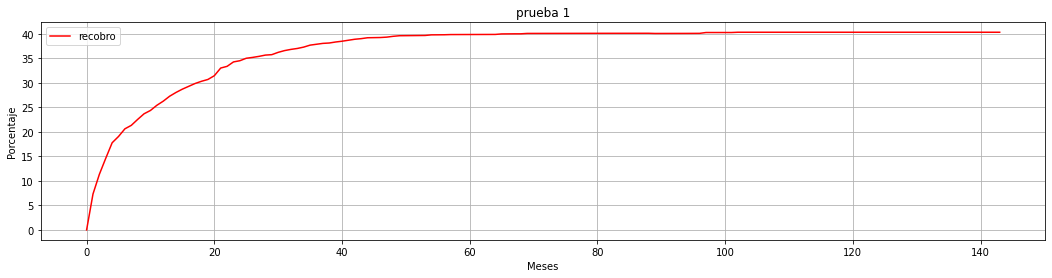

In [35]:
fig

### 2.1.1 Ejercicio práctico #1

Grafique ahora en un mismo gráfico las columnas "escala" versus "recobro_sc_fd_lr_1016" y "recobro_cc_1016".


### 2.1.2 Ejercicio práctico #2

dada la siguiente tabla 

In [4]:
df = spark.table("gmetyprov."+"GRAFICO_"+"PYI_NEG"+"_"+"prod_Driv4"+"_12A")
df.toPandas()

,FEC_AN,prod_Driv4,N,AVG_LGD_T_LR
0,2010,113,22,0.341662
1,2009,13,114,0.501932
2,2012,1665,6,0.452282
3,2016,1665,4,0.352234
4,2014,113,62,0.395670
5,2009,113,31,0.388204
6,2016,13,32,0.546166
7,2015,13,26,0.353867
8,2014,1665,3,0.365236
9,2008,1665,3,0.440664


Se pide graficar la columna "AVG_LGD_T_LR" para cada categoria de la columna "prod_Driv4"

In [5]:
# Capturamos las categorias en una lista
categorias = list(df.toPandas()["prod_Driv4"].unique())

In [7]:
# Buscamos en el DataFrame en qué parte tengo cada categoria, para esto usamos la función where
df.where(col("prod_Driv4")==13).orderBy("FEC_AN").toPandas()

,FEC_AN,prod_Driv4,N,AVG_LGD_T_LR
0,2008,13,127,0.651915
1,2009,13,114,0.501932
2,2010,13,93,0.542478
3,2011,13,50,0.533355
4,2012,13,45,0.481911
5,2013,13,45,0.500173
6,2014,13,37,0.391462
7,2015,13,26,0.353867
8,2016,13,32,0.546166


In [8]:
LGD =[]
Fechas = []

for categoria in categorias:
    LGD.append([c*100 for c in df.where(col("prod_Driv4")==int(categoria)).orderBy("FEC_AN").rdd.map(lambda x: x.AVG_LGD_T_LR).collect()])
    Fechas.append(df.where(col("prod_Driv4")==int(categoria)).orderBy("FEC_AN").rdd.map(lambda x: x.FEC_AN).collect())

In [9]:
colors = ["red","green","blue","yellow","black"]

In [28]:
import numpy as np

lista = [1,2]
array = np.array(lista)

In [29]:
array.max()

2

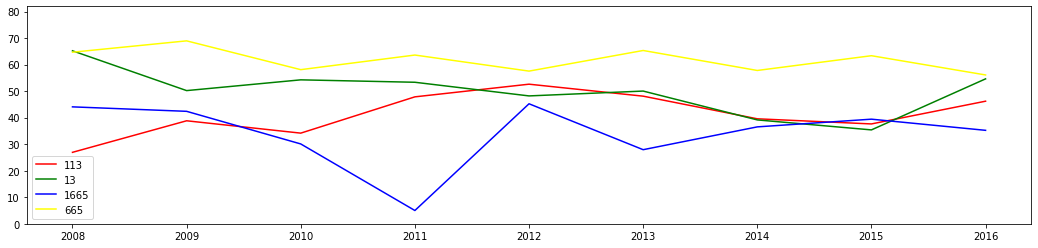

In [33]:
# Graficamos
import matplotlib.pyplot as plt
# Importar numpy para funcionalidad de máximo
maximos = []
fig = plt.figure(figsize=(18,4))
for i in range(len(categorias)):
    plt.plot(Fechas[i],LGD[i],color=colors[i],label=int(categorias[i]))
    np.array(maximos.append(np.array(LGD[i]).max()))
    
plt.ylim(0,np.array(maximos).max() +13)

plt.legend()

### 2.1.3 Ejercicio práctico #3

Dada la siguiente tabla:

In [34]:
df = spark.table("gmetyprov."+"table_iv_output_extrapolacion_"+"Consumo"+"_"+"Pers_ant"+"_"+"FE")
df.printSchema()

root
 |-- Variable: string (nullable = true)
 |-- BIN: integer (nullable = true)
 |-- Lb: double (nullable = true)
 |-- Ub: double (nullable = true)
 |-- good: long (nullable = true)
 |-- bad: long (nullable = true)
 |-- TotalGood: long (nullable = true)
 |-- TotalBad: long (nullable = true)
 |-- Count: long (nullable = true)
 |-- good_distr: double (nullable = true)
 |-- bad_distr: double (nullable = true)
 |-- badprob: double (nullable = true)
 |-- woe: double (nullable = true)
 |-- iv: double (nullable = true)
 |-- iv_total: double (nullable = true)
 |-- Tipo_Categ: string (nullable = true)



In [35]:
df.toPandas()

,Variable,BIN,Lb,Ub,good,bad,TotalGood,TotalBad,Count,good_distr,bad_distr,badprob,woe,iv,iv_total,Tipo_Categ
0,PRBP1_SBIF_NUM_ACRE_N,1,0.0,0.000000e+00,62,0,313971,19509,62,0.000197,0.000000,0.000000,0.000000,0.000000,0.456525,normal_categ
1,PRBP1_SBIF_NUM_ACRE_N,3,0.0,1.000000e+00,115913,5589,313971,19509,121502,0.369184,0.286483,0.045999,0.253615,0.020974,0.456525,normal_categ
2,DSBF_MORA_30_90,1,0.0,0.000000e+00,2989,4,313971,19509,2993,0.009520,0.000205,0.001336,3.837975,0.035751,0.367480,normal_categ
3,DSBF_MORA_30_90,3,0.0,inf,14809,4534,313971,19509,19343,0.047167,0.232406,0.234400,-1.594794,0.295418,0.367480,normal_categ
4,media_pasivo_u3,3,0.0,7.825067e+04,58603,5451,313971,19509,64054,0.186651,0.279410,0.085100,-0.403438,0.037422,0.740439,normal_categ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,subseg,2,155.0,1.600000e+02,53318,2923,313971,19509,56241,0.169818,0.149828,0.051973,0.125239,0.002504,0.110750,normal_categ
405,subseg,3,160.0,1.610000e+02,53374,5670,313971,19509,59044,0.169997,0.290635,0.096030,-0.536290,0.064697,0.110750,normal_categ
406,subseg,4,161.0,1.700000e+02,54761,2297,313971,19509,57058,0.174414,0.117741,0.040257,0.392950,0.022270,0.110750,normal_categ
407,subseg,5,170.0,9.050000e+02,80211,5350,313971,19509,85561,0.255473,0.274232,0.062528,-0.070861,0.001329,0.110750,normal_categ


Se pide graficar para alguna variable un histograma en donde quede explícito el porcentaje de clientes existentes en cada "Bin", junto con gráficos de línea de "FDO" y WOE.

In [41]:
# Seleccionamos una variable para el gráfico y guardamos 
df_var = df.where(col("Variable")=="porc_prom_LCA").orderBy("BIN")

In [42]:
df_var.toPandas()

,Variable,BIN,Lb,Ub,good,bad,TotalGood,TotalBad,Count,good_distr,bad_distr,badprob,woe,iv,iv_total,Tipo_Categ
0,porc_prom_LCA,1,0.00,0.00,14096,2112,313971,19509,16208,0.044896,0.108258,0.130306,-0.880169,0.055769,1.099389,normal_categ
1,porc_prom_LCA,2,-888889.00,-888889.00,135978,6645,313971,19509,142623,0.433091,0.340612,0.046591,0.240204,0.022214,1.099389,special_categ
2,porc_prom_LCA,3,-inf,0.01,70543,409,313971,19509,70952,0.224680,0.020965,0.005764,2.371838,0.483180,1.099389,normal_categ
3,porc_prom_LCA,4,0.01,0.20,27598,489,313971,19509,28087,0.087900,0.025065,0.017410,1.254711,0.078839,1.099389,normal_categ
4,porc_prom_LCA,5,0.20,0.50,16810,620,313971,19509,17430,0.053540,0.031780,0.035571,0.521585,0.011350,1.099389,normal_categ
5,porc_prom_LCA,6,0.50,0.80,14374,961,313971,19509,15335,0.045781,0.049259,0.062667,-0.073223,0.000255,1.099389,normal_categ
6,porc_prom_LCA,7,0.80,0.90,5811,572,313971,19509,6383,0.018508,0.029320,0.089613,-0.460056,0.004974,1.099389,normal_categ
7,porc_prom_LCA,8,0.90,inf,28761,7701,313971,19509,36462,0.091604,0.394741,0.211206,-1.460755,0.442809,1.099389,normal_categ


In [43]:
# Capturamos los datos que nos interesan
bins = df_var.rdd.map(lambda x: x.BIN).collect()
counts = df_var.rdd.map(lambda x: x.Count).collect()
woe = df_var.rdd.map(lambda x: x.woe).collect()
FDO = df_var.rdd.map(lambda x: x.badprob).collect()

In [49]:
# Creamos una lista con porcentajes a partir de la lista Counts
counts = np.array(counts)
sum_total = counts.sum()

percent = [(c/sum_total)*100 for c in counts]

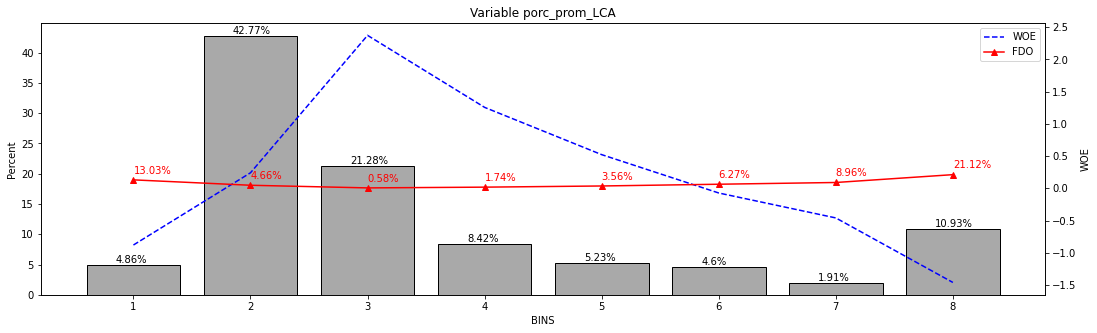

In [71]:
# Ya con toda la información, graficamos 
fig, ax_1 = plt.subplots(figsize = (18,5))
ax_1.set_ylabel("Percent")
ax_1.set_xlabel("BINS")
plt.bar(bins,percent,color="darkgrey",edgecolor="black")
for a,b in zip(bins,percent):
    plt.text(a-0.15,b+0.35,str(np.round(b,2))+"%")

# Añadimos una segunda escala
ax_2 = ax_1.twinx()
ax_2.set_ylabel("WOE")
plt.plot(bins,woe,"b--",label="WOE")
plt.plot(bins,FDO,label="FDO",color="red",marker="^")
for a,b in zip(bins,FDO):
    plt.text(a,b+0.1,str(np.round(b*100,2))+"%",color='red')

plt.title("Variable porc_prom_LCA")
plt.legend();

## 3.- Transformación de Datos

In [72]:
import pandas as pd

In [75]:
baseline = pd.read_csv("./Tablas_input_pd_loc/Baseline_comp.csv",sep=";") #Lo trae como pandas

In [77]:
Baseline = spark.createDataFrame(baseline) # Ahora sí es de spark

In [79]:
Baseline.printSchema()

root
 |-- id: long (nullable = true)
 |-- Segmentos: string (nullable = true)
 |-- T1: string (nullable = true)
 |-- T2: string (nullable = true)
 |-- T3: string (nullable = true)
 |-- T4: string (nullable = true)
 |-- T5: string (nullable = true)
 |-- T6: string (nullable = true)
 |-- T7: string (nullable = true)
 |-- T8: string (nullable = true)
 |-- T9: string (nullable = true)
 |-- T10: string (nullable = true)
 |-- T11: string (nullable = true)



In [80]:
baseline

,id,Segmentos,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11
0,1,MODELO_51 [100-531],13.6846771000%,16.4740753000%,16.9764058000%,17.3539600000%,11.9964226000%,11.0811236000%,9.9862611814%,9.1651143675%,8.5264446233%,8.0155088280%,7.5974704500%
1,2,MODELO_51 [532-552],6.3171784000%,11.2301637000%,12.5518169000%,11.7233724000%,8.9041797000%,8.5049074292%,8.2197129500%,8.0058170906%,7.8394536444%,7.7063628875%,7.5974704500%
2,3,MODELO_51 [553-581],3.1230423000%,6.3911417000%,7.8567813000%,9.3483283000%,8.3294994000%,8.1058238875%,7.9460556643%,7.8262294969%,7.7330313667%,7.6584728625%,7.5974704500%
3,4,MODELO_51 [582-999],1.1358355000%,3.1009623000%,3.9530173000%,4.4460557000%,4.9780416000%,5.7784226375%,6.3501233786%,6.7788989344%,7.1123910333%,7.3791847125%,7.5974704500%
4,5,MODELO_961 [100-559],7.0790607000%,9.4932007000%,10.0613958000%,9.2144214609%,8.7062368575%,8.3674471219%,8.1254544536%,7.9439599523%,7.8027975625%,7.6898676506%,7.5974704500%
5,6,MODELO_961 [560-999],4.5087948000%,6.8947868000%,7.2093452000%,7.3427632547%,7.4228140875%,7.4761813094%,7.5143007536%,7.5428903367%,7.5651266792%,7.5829157531%,7.5974704500%
6,7,MODELO_991 [100-999],1.2523820000%,2.4901065000%,4.6931690000%,5.5968699000%,4.5054949000%,5.4502652069%,6.1251011405%,6.6312280906%,7.0248823852%,7.3398058208%,7.5974704500%
7,8,CURA,26.1721908000%,15.9704578000%,13.7623328000%,14.6566818000%,12.2755662000%,11.3654285000%,10.7174492000%,9.6449565047%,8.8107955194%,8.1434667313%,7.5974704500%
8,9,IRREG_1-30,36.9469928000%,23.8772271000%,26.6400215000%,24.1123235000%,20.9157585000%,16.8462815958%,13.9395123786%,11.7594354656%,10.0638200889%,8.7073277875%,7.5974704500%
9,10,IRREG_31-60,53.0323750000%,31.0101141000%,30.0318882000%,21.5877710000%,15.6101603000%,13.1618384014%,11.4130370452%,10.1014360281%,9.0813019037%,8.2651946042%,7.5974704500%


In [81]:
def transformacion(str):
    return str.replace("%","")

In [82]:
porcentaje = "18%"

In [83]:
porcentaje_transformado = transformacion(porcentaje)

In [85]:
int(porcentaje_transformado)

18

In [86]:
# Creamos udf para transformación 
@udf(returnType=StringType())
def percent_transform(percent):
    return percent.replace("%","")

In [87]:
# Transformamos 
for columna in Baseline.columns[2:]:
    Baseline = Baseline.withColumn(columna,(percent_transform(col(columna))/100).cast("Double"))

In [88]:
Baseline.printSchema()

root
 |-- id: long (nullable = true)
 |-- Segmentos: string (nullable = true)
 |-- T1: double (nullable = true)
 |-- T2: double (nullable = true)
 |-- T3: double (nullable = true)
 |-- T4: double (nullable = true)
 |-- T5: double (nullable = true)
 |-- T6: double (nullable = true)
 |-- T7: double (nullable = true)
 |-- T8: double (nullable = true)
 |-- T9: double (nullable = true)
 |-- T10: double (nullable = true)
 |-- T11: double (nullable = true)



In [89]:
Baseline.toPandas()

,id,Segmentos,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11
0,1,MODELO_51 [100-531],0.136847,0.164741,0.169764,0.173540,0.119964,0.110811,0.099863,0.091651,0.085264,0.080155,0.075975
1,2,MODELO_51 [532-552],0.063172,0.112302,0.125518,0.117234,0.089042,0.085049,0.082197,0.080058,0.078395,0.077064,0.075975
2,3,MODELO_51 [553-581],0.031230,0.063911,0.078568,0.093483,0.083295,0.081058,0.079461,0.078262,0.077330,0.076585,0.075975
3,4,MODELO_51 [582-999],0.011358,0.031010,0.039530,0.044461,0.049780,0.057784,0.063501,0.067789,0.071124,0.073792,0.075975
4,5,MODELO_961 [100-559],0.070791,0.094932,0.100614,0.092144,0.087062,0.083674,0.081255,0.079440,0.078028,0.076899,0.075975
5,6,MODELO_961 [560-999],0.045088,0.068948,0.072093,0.073428,0.074228,0.074762,0.075143,0.075429,0.075651,0.075829,0.075975
6,7,MODELO_991 [100-999],0.012524,0.024901,0.046932,0.055969,0.045055,0.054503,0.061251,0.066312,0.070249,0.073398,0.075975
7,8,CURA,0.261722,0.159705,0.137623,0.146567,0.122756,0.113654,0.107174,0.096450,0.088108,0.081435,0.075975
8,9,IRREG_1-30,0.369470,0.238772,0.266400,0.241123,0.209158,0.168463,0.139395,0.117594,0.100638,0.087073,0.075975
9,10,IRREG_31-60,0.530324,0.310101,0.300319,0.215878,0.156102,0.131618,0.114130,0.101014,0.090813,0.082652,0.075975


## Extra : Joins

Documentación : https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.join.html

pag_ejemplos : https://sparkbyexamples.com/pyspark/pyspark-join-explained-with-examples/